### Capstone Project - Pnuemonia Detection using Yolov3

### References:
1) Yolo Github Repositories from pjreddie and AlexeyAB:
https://github.com/pjreddie/darknet#darknet
https://github.com/AlexeyAB/darknet
<br>
2) keras-yolov3 version from Huynh Ngoc Anh available at the following link:
experiencor/keras-yolo3: Training and Detecting Objects with YOLO3 (github.com)
https://github.com/experiencor/keras-yolo3
<br>
3) Blog article to get a basic understanding of the yolo model and its usage: How to Perform Object Detection With YOLOv3 in Keras (machinelearningmastery.com)
https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Initial Imports and Data Setup

In [1]:
import pickle
import os
import numpy as np
import pandas as pd

import cv2
from google.colab.patches import cv2_imshow

In [2]:
datasetFolder = '/content/drive/MyDrive/Project Datasets/Capstone Project/'
os.chdir(datasetFolder)

In [3]:
# inputdir = '/content/drive/MyDrive/CapstoneDataSet/dataset/jpg_reshaped_train'
# presentOutdir = datasetFolder + 'jpg_reshaped_train/present'
presentOutdir = datasetFolder + 'train_images_present'
# AbsentOutdir = datasetFolder + 'jpg_reshaped_train/absent'
testdir = datasetFolder + 'test_images'

In [4]:
testdir

'/content/drive/MyDrive/Project Datasets/Capstone Project/test_images'

In [5]:
file = open(datasetFolder + 'RezisedLabel.pickle', 'rb')
dfLabelsCopy = pickle.load(file)
file.close()

In [6]:
dfLabelsCopy.head()

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024,256,256,66.0,38.0,54.0,95.0


In [ ]:
pickleddatasetFolder = '/content/drive/MyDrive/Project Datasets/Capstone Project/dataset_pickle/'
file_new = open(pickleddatasetFolder + 'RezisedLabel-1.pickle', 'rb')
dfData = pickle.load(file_new)
file_new.close()

In [ ]:
dfData.head()

,patientId,x,y,width,height,Target,X,Y,Image256,Xo,Yo,xo,yo,widtho,heighto,Age,Sex
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1024,1024,"[[92, 50, 30, 17, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4...",256,256,NaN,NaN,NaN,NaN,51,F
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1024,1024,"[[20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",256,256,NaN,NaN,NaN,NaN,48,F
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1024,1024,"[[18, 16, 15, 15, 14, 14, 13, 14, 14, 14, 14, ...",256,256,NaN,NaN,NaN,NaN,19,M
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1024,1024,"[[205, 202, 193, 192, 187, 185, 180, 179, 177,...",256,256,NaN,NaN,NaN,NaN,28,M
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024,"[[2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 4, 4, 5,...",256,256,66.0,38.0,54.0,95.0,32,F


In [ ]:
dfData_0 = dfData[dfData['Target'] == 0].sample(9555)
dfData_1 = dfData[dfData['Target'] == 1].sample(9555)

dfData = pd.concat([dfData_0, dfData_1], axis=0, ignore_index=True)
dfData = dfData.sample(frac=1)

In [ ]:
dfLabelsCopy.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target', 'X', 'Y', 'Xo',
       'Yo', 'xo', 'yo', 'widtho', 'heighto'],
      dtype='object')

In [ ]:
dfLabelsCopy.head()

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024,256,256,66.0,38.0,54.0,95.0


In [ ]:
def show_img(patientId):
  points = np.array(dfLabelsCopy[dfLabelsCopy.patientId == patientId][['xo','yo','widtho','heighto']])

  img = cv2.imread(presentOutdir + '/' + patientId + '.jpg')

  for i in points:
    start = (int(i[0]), int(i[1]))
    end = (int(i[0]+i[2]) , int(i[1]+i[3]))
    color = (255,0,0)
    img = cv2.rectangle(img, start , end, color, 2)

  cv2_imshow(img)

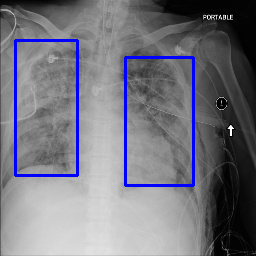

In [ ]:
show_img('c37e4ade-605d-4b78-ada5-231c82b72b43')

In [ ]:
dfLabelsCopy2 = dfLabelsCopy.fillna(0)

In [ ]:
dfLabelsCopy.head()

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024,256,256,66.0,38.0,54.0,95.0


In [ ]:
dfLabelsCopy2.head()

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024,256,256,66.0,38.0,54.0,95.0


In [ ]:
dfLabelsCopy2.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target', 'X', 'Y', 'Xo',
       'Yo', 'xo', 'yo', 'widtho', 'heighto'],
      dtype='object')

In [ ]:
dfLabelsCopy2['counts'] = dfLabelsCopy2.groupby('patientId')['Xo'].transform('count')

In [ ]:
dfLabelsCopy2.loc[dfLabelsCopy2['Target'] == 0, 'counts'] = 0

In [ ]:
dfLabelsCopy2.sort_values('counts', ascending=True)

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto,counts
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0,0
15472,97260777-d4e5-4fcd-ab3c-43c0c3d6852a,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0,0
15471,9723d119-6dea-43f4-abb8-40961f4513e1,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0,0
15470,97217753-20da-4bc8-a64c-a35d183fae9c,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0,0
15468,972094b7-b961-474f-a0d8-33a5fd88cc29,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29532,1c44e0a4-4612-438f-9a83-8d5bf919cb67,315.0,363.0,126.0,144.0,1,1024,1024,256,256,79.0,91.0,32.0,36.0,4
29192,0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d,213.0,386.0,114.0,161.0,1,1024,1024,256,256,54.0,97.0,29.0,41.0,4
2863,349f10b4-dc3e-4f3f-b2e4-a5b81448ce87,204.0,385.0,219.0,222.0,1,1024,1024,256,256,51.0,97.0,55.0,56.0,4
14311,8dc8e54b-5b05-4dac-80b9-fa48878621e2,199.0,492.0,267.0,452.0,1,1024,1024,256,256,50.0,123.0,67.0,113.0,4


In [ ]:
dfLabelsCopy2['counts'].value_counts()

0    20672
2     6532
1     2614
3      357
4       52
Name: counts, dtype: int64

In [ ]:
# # Code to copy test images from source folder to test_images in my drive

# import shutil, os
# source_dir_test = "/content/drive/MyDrive/Project Datasets/Capstone Project/jpg_reshaped_test/"
# dest_dir_test = "/content/drive/MyDrive/Project Datasets/Capstone Project/test_images/"
# files_test = os.listdir(source_dir_test)[:100]
# for f in files_test:
#     shutil.copy(source_dir_test + f, dest_dir_test)

In [ ]:
# Code to copy a subset of images from source folder to train_images_present

# import shutil, os
# source_dir = "/content/drive/MyDrive/Project Datasets/Capstone Project/jpg_reshaped_train/present/"
# dest_dir = "/content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present2/"
# files = os.listdir(source_dir)[:1000]
# for f in files:
#     shutil.copy(source_dir + f, dest_dir)

In [ ]:
# Code to copy backup previous annotations to a sub-folder

# !cp -r '/content/drive/MyDrive/Project Datasets/Capstone Project/annotations/' '/content/drive/MyDrive/Project Datasets/Capstone Project/annotations2/'

In [ ]:
# list4 = os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/annotations/')
# number_files4 = len(list4)
# print ('Number of annotation files corresponding to train data with penumonia present - ', number_files41)

# list41 = os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/annotations2/')
# number_files41 = len(list41)
# print ('Number of annotation files corresponding to train data with penumonia present - ', number_files41)

In [ ]:
presentOutdir = datasetFolder + 'train_images_present2'

In [ ]:
presentOutdir

'/content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present2'

In [ ]:
currentImagesList = os.listdir(presentOutdir)
imageNamesList =  [i.split('.')[0] for i in currentImagesList]

In [ ]:
len(imageNamesList)

1000

In [ ]:
imageNamesList[:4]

['c37d38fe-a11e-453a-88a5-5d919bf9f760',
 'c3853f9a-a16f-4ee4-8bdb-5f636755855d',
 'c3985003-dd35-42c2-9a6d-c9372742eac2',
 'c3768927-0d7e-4624-bf5a-3eea2011a5c1']

In [ ]:
dfLabelsCopy4 = dfLabelsCopy2[dfLabelsCopy2['patientId'].isin(imageNamesList)]

In [ ]:
dfLabelsCopy4 = dfLabelsCopy4.reset_index(drop=True)

In [ ]:
dfLabelsCopy4.isnull().values.any()

False

In [ ]:
dfLabelsCopy4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  1483 non-null   object 
 1   x          1483 non-null   float64
 2   y          1483 non-null   float64
 3   width      1483 non-null   float64
 4   height     1483 non-null   float64
 5   Target     1483 non-null   int64  
 6   X          1483 non-null   int64  
 7   Y          1483 non-null   int64  
 8   Xo         1483 non-null   int64  
 9   Yo         1483 non-null   int64  
 10  xo         1483 non-null   float64
 11  yo         1483 non-null   float64
 12  widtho     1483 non-null   float64
 13  heighto    1483 non-null   float64
 14  counts     1483 non-null   int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 173.9+ KB


In [ ]:
dfLabelsCopy4["xo"].astype('int64')

0        47
1       136
2        60
3       167
4        54
       ... 
1478     40
1479    143
1480     40
1481     45
1482    161
Name: xo, Length: 1483, dtype: int64

In [ ]:
dfLabelsCopy4.head()

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto,counts
0,c3768927-0d7e-4624-bf5a-3eea2011a5c1,185.0,451.0,206.0,405.0,1,1024,1024,256,256,47.0,113.0,52.0,102.0,2
1,c3768927-0d7e-4624-bf5a-3eea2011a5c1,541.0,395.0,237.0,459.0,1,1024,1024,256,256,136.0,99.0,60.0,115.0,2
2,c37cfadd-1e52-4704-9831-403826ad2974,239.0,153.0,275.0,539.0,1,1024,1024,256,256,60.0,39.0,69.0,135.0,2
3,c37cfadd-1e52-4704-9831-403826ad2974,667.0,158.0,279.0,466.0,1,1024,1024,256,256,167.0,40.0,70.0,117.0,2
4,c37d38fe-a11e-453a-88a5-5d919bf9f760,216.0,424.0,163.0,413.0,1,1024,1024,256,256,54.0,106.0,41.0,104.0,2


In [ ]:
dfLabelsCopy4.shape

(1483, 15)

In [ ]:
dfLabelsCopy4.patientId.value_counts()

ee820aa5-4804-4984-97b3-f0a71d69702f    4
ec885fc7-04cc-47a5-b971-11ef284c229f    3
e17e53a5-916f-40c8-9c9c-dcc01031aa46    3
f1ba6a94-27b8-4537-8a11-6c4dbc3fe428    3
f184f903-7ec4-4b69-8ac1-1f2d171065ef    3
                                       ..
ec53eccf-e4e5-4151-b50b-d103e799a1f2    1
e32c79df-9fe1-4ed0-bde4-eba4e341936d    1
f1dfdb40-da03-4577-95a1-da4b170613d1    1
fb8167ad-76f8-4f75-a422-90304c82f9d7    1
f7f3e746-b2d6-47e8-87fd-e7d9db9b1836    1
Name: patientId, Length: 1000, dtype: int64

In [ ]:
dfLabelsCopy2.head()

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto,counts
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,1024,1024,256,256,0.0,0.0,0.0,0.0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024,256,256,66.0,38.0,54.0,95.0,2


In [ ]:
dfLabelsCopy4.head()

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto,counts
0,c3768927-0d7e-4624-bf5a-3eea2011a5c1,185.0,451.0,206.0,405.0,1,1024,1024,256,256,47.0,113.0,52.0,102.0,2
1,c3768927-0d7e-4624-bf5a-3eea2011a5c1,541.0,395.0,237.0,459.0,1,1024,1024,256,256,136.0,99.0,60.0,115.0,2
2,c37cfadd-1e52-4704-9831-403826ad2974,239.0,153.0,275.0,539.0,1,1024,1024,256,256,60.0,39.0,69.0,135.0,2
3,c37cfadd-1e52-4704-9831-403826ad2974,667.0,158.0,279.0,466.0,1,1024,1024,256,256,167.0,40.0,70.0,117.0,2
4,c37d38fe-a11e-453a-88a5-5d919bf9f760,216.0,424.0,163.0,413.0,1,1024,1024,256,256,54.0,106.0,41.0,104.0,2


In [ ]:
# dfLabelsCopy4['counts'] = dfLabelsCopy4.groupby('patientId')['Xo'].transform('count')

In [ ]:
# dfLabelsCopy4.loc[dfLabelsCopy4['Target'] == 0, 'counts'] = 0

In [ ]:
dfLabelsCopy4.sort_values('counts', ascending=True)

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto,counts
741,e32be4a8-2f2c-436a-8a3c-e4e424fad060,349.0,511.0,133.0,181.0,1,1024,1024,256,256,88.0,128.0,34.0,46.0,1
544,d98964c9-e676-4e33-a456-27cea6ff007a,138.0,561.0,273.0,276.0,1,1024,1024,256,256,35.0,141.0,69.0,69.0,1
545,d99282ee-dc00-40d4-bb8d-5f8dba263a05,246.0,351.0,220.0,175.0,1,1024,1024,256,256,62.0,88.0,55.0,44.0,1
546,d99e786f-9de0-44b4-bb3a-00fba6c72994,201.0,489.0,220.0,145.0,1,1024,1024,256,256,51.0,123.0,55.0,37.0,1
547,d9a6fe09-9ee9-4d64-bc42-cd903276f513,178.0,690.0,186.0,148.0,1,1024,1024,256,256,45.0,173.0,47.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,f184f903-7ec4-4b69-8ac1-1f2d171065ef,169.0,453.0,140.0,193.0,1,1024,1024,256,256,43.0,114.0,35.0,49.0,3
1010,ee820aa5-4804-4984-97b3-f0a71d69702f,168.0,611.0,158.0,117.0,1,1024,1024,256,256,42.0,153.0,40.0,30.0,4
1009,ee820aa5-4804-4984-97b3-f0a71d69702f,211.0,238.0,167.0,235.0,1,1024,1024,256,256,53.0,60.0,42.0,59.0,4
1008,ee820aa5-4804-4984-97b3-f0a71d69702f,634.0,569.0,193.0,175.0,1,1024,1024,256,256,159.0,143.0,49.0,44.0,4


In [ ]:
dfLabelsCopy4[dfLabelsCopy4['patientId']=='c37e4ade-605d-4b78-ada5-231c82b72b43']

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto,counts
6,c37e4ade-605d-4b78-ada5-231c82b72b43,59.0,159.0,248.0,540.0,1,1024,1024,256,256,15.0,40.0,62.0,135.0,2
7,c37e4ade-605d-4b78-ada5-231c82b72b43,497.0,228.0,270.0,512.0,1,1024,1024,256,256,125.0,57.0,68.0,128.0,2


In [ ]:
dfLabelsCopy4['counts'].value_counts()

2    900
1    534
3     45
4      4
Name: counts, dtype: int64

In [ ]:
###### To generate xml annotations for the images
!pip install pascal-voc-writer

In [ ]:
# FINAL ONE
from pascal_voc_writer import Writer

for i,pt_id in dfLabelsCopy4['patientId'].iteritems():
  print('i=', i, ' and pt_id=',pt_id)
  if (dfLabelsCopy4['counts'][i] == 0):
      print('encountered negative image')
      print ('i=', i, 'patientId =', pt_id, 'xo column=', dfLabelsCopy4['xo'][i].astype('int32'))
      # print ("Initializing Writer")
      # Writer(path, width, height)
      # writer = Writer(presentOutdir + '/' +pt_id + '.jpg',  dfLabelsCopy4['Xo'][i], dfLabelsCopy4['Yo'][i])
      # ::save(path)
      # writer.save(datasetFolder + 'annotations/' + pt_id + '.XML')
  if (dfLabelsCopy4['counts'][i] == 1):
      print('encountered patient id with one box')
      print ('i=', i, 'patientId =', pt_id, 'xo column=', dfLabelsCopy4['xo'][i].astype('int32'))
      print ("Initializing Writer")
      # Writer(path, width, height)
      writer = Writer(presentOutdir + '/' +pt_id + '.jpg',  dfLabelsCopy4['Xo'][i].astype('int32'), dfLabelsCopy4['Yo'][i].astype('int32'))
      print ("Adding bounding box object")
      # ::addObject(name, xmin, ymin, xmax, ymax)
      writer.addObject('opacity', dfLabelsCopy4['xo'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32'), dfLabelsCopy4['xo'][i].astype('int32') +  dfLabelsCopy4['widtho'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32')+dfLabelsCopy4['heighto'][i].astype('int32'))
      # ::save(path)
      # writer.save(datasetFolder + 'annotations/' + pt_id + '.XML')
      writer.save(datasetFolder + 'train_annotations_present2/' + pt_id + '.XML')
  elif (dfLabelsCopy4['counts'][i] == 2):
    print('encountered patient id with two boxes')
    if(i>0 and pt_id == dfLabelsCopy4['patientId'][i-1]):
      print ('i-1=', i-1, 'patientId =', pt_id, 'xo column=', dfLabelsCopy4['xo'][i-1].astype('int32'))
      print ('i=', i, 'patientId =', pt_id, 'xo column=', dfLabelsCopy4['xo'][i].astype('int32'))
      # ::addObject(name, xmin, ymin, xmax, ymax)
      writer.addObject('opacity', dfLabelsCopy4['xo'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32'), dfLabelsCopy4['xo'][i].astype('int32') +  dfLabelsCopy4['widtho'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32')+dfLabelsCopy4['heighto'][i].astype('int32'))
      # ::save(path)
      # writer.save(datasetFolder + 'annotations/' + pt_id + '.XML')
      writer.save(datasetFolder + 'train_annotations_present2/' + pt_id + '.XML')
    else:
      print ("Initializing Writer")
      # Writer(path, width, height)
      writer = Writer(presentOutdir + '/' +pt_id + '.jpg',  dfLabelsCopy4['Xo'][i].astype('int32'), dfLabelsCopy4['Yo'][i].astype('int32'))
    print ("Adding bounding box object with i=", i)
    # ::addObject(name, xmin, ymin, xmax, ymax)
    writer.addObject('opacity', dfLabelsCopy4['xo'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32'), dfLabelsCopy4['xo'][i].astype('int32') +  dfLabelsCopy4['widtho'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32')+dfLabelsCopy4['heighto'][i].astype('int32'))
  elif (dfLabelsCopy4['counts'][i] == 3):
    print('encountered patient id with three boxes')
    if(i>1 and pt_id == dfLabelsCopy4['patientId'][i-2]):
      print ('i-2=', i-2, 'patientId =', pt_id, 'xo column=', dfLabelsCopy4['xo'][i-2].astype('int32'))
      print ('i-1=', i-1, 'patientId =', pt_id, 'xo column=', dfLabelsCopy4['xo'][i-1].astype('int32'))
      print ('i=', i, 'patientId =', pt_id, 'xo column=', dfLabelsCopy4['xo'][i].astype('int32'))
      # ::addObject(name, xmin, ymin, xmax, ymax)
      writer.addObject('opacity', dfLabelsCopy4['xo'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32'), dfLabelsCopy4['xo'][i].astype('int32') +  dfLabelsCopy4['widtho'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32')+dfLabelsCopy4['heighto'][i].astype('int32'))
      # ::save(path)
      # writer.save(datasetFolder + 'annotations/' + pt_id + '.XML')
      writer.save(datasetFolder + 'train_annotations_present2/' + pt_id + '.XML')
    elif((i>1 and pt_id != dfLabelsCopy4['patientId'][i-1] )):
      print ("Initializing Writer")
      # Writer(path, width, height)
      writer = Writer(presentOutdir + '/' +pt_id + '.jpg',  dfLabelsCopy4['Xo'][i].astype('int32'), dfLabelsCopy4['Yo'][i].astype('int32'))
    print ("Adding bounding box object")
    # ::addObject(name, xmin, ymin, xmax, ymax)
    writer.addObject('opacity', dfLabelsCopy4['xo'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32'), dfLabelsCopy4['xo'][i].astype('int32') +  dfLabelsCopy4['widtho'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32')+dfLabelsCopy4['heighto'][i].astype('int32'))
  elif (dfLabelsCopy4['counts'][i] == 4):
    print('encountered patient id with four boxes')
    if(i>2 and pt_id == dfLabelsCopy4['patientId'][i-3]):
      print ('i-3=', i-3, 'patientId =', pt_id, 'xo column=', dfLabelsCopy4['xo'][i-3].astype('int32'))
      print ('i-2=', i-2, 'patientId =', pt_id, 'xo column=', dfLabelsCopy4['xo'][i-2].astype('int32'))
      print ('i-1=', i-1, 'patientId =', pt_id, 'xo column=', dfLabelsCopy4['xo'][i-1].astype('int32'))
      print ('i=', i, 'patientId =', pt_id, 'xo column=', dfLabelsCopy4['xo'][i].astype('int32'))
      # ::addObject(name, xmin, ymin, xmax, ymax)
      writer.addObject('opacity', dfLabelsCopy4['xo'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32'), dfLabelsCopy4['xo'][i].astype('int32') +  dfLabelsCopy4['widtho'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32')+dfLabelsCopy4['heighto'][i].astype('int32'))
      # ::save(path)
      # writer.save(datasetFolder + 'annotations/' + pt_id + '.XML')
      writer.save(datasetFolder + 'train_annotations_present2/' + pt_id + '.XML')
    elif(i>2 and pt_id != dfLabelsCopy4['patientId'][i-1]):
      print ("Initializing Writer")
      # Writer(path, width, height)
      writer = Writer(presentOutdir + '/' +pt_id + '.jpg',  dfLabelsCopy4['Xo'][i].astype('int32'), dfLabelsCopy4['Yo'][i].astype('int32'))
    print ("Adding bounding box object")
    # ::addObject(name, xmin, ymin, xmax, ymax)
    writer.addObject('opacity', dfLabelsCopy4['xo'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32'), dfLabelsCopy4['xo'][i].astype('int32') +  dfLabelsCopy4['widtho'][i].astype('int32'), dfLabelsCopy4['yo'][i].astype('int32')+dfLabelsCopy4['heighto'][i].astype('int32'))

Streaming output truncated to the last 5000 lines.
i= 418  and pt_id= d4653287-cdac-4e8b-94db-b3c71147faf4
encountered patient id with two boxes
i-1= 417 patientId = d4653287-cdac-4e8b-94db-b3c71147faf4 xo column= 62
i= 418 patientId = d4653287-cdac-4e8b-94db-b3c71147faf4 xo column= 140
Adding bounding box object with i= 418
i= 419  and pt_id= d4683e9b-ee14-40e1-a9f9-1eebd8d125ee
encountered patient id with two boxes
Initializing Writer
Adding bounding box object with i= 419
i= 420  and pt_id= d4683e9b-ee14-40e1-a9f9-1eebd8d125ee
encountered patient id with two boxes
i-1= 419 patientId = d4683e9b-ee14-40e1-a9f9-1eebd8d125ee xo column= 72
i= 420 patientId = d4683e9b-ee14-40e1-a9f9-1eebd8d125ee xo column= 148
Adding bounding box object with i= 420
i= 421  and pt_id= d471c394-f44a-47a4-9e41-6a651b8916cc
encountered patient id with two boxes
Initializing Writer
Adding bounding box object with i= 421
i= 422  and pt_id= d471c394-f44a-47a4-9e41-6a651b8916cc
encountered patient id with two box

In [ ]:
# os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/jpg_reshaped_train/present/')

In [ ]:
# os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/annotations/')

In [ ]:
# list = os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/jpg_reshaped_train/present/')
# number_files = len(list)
# print ('Number of train files with pneumonia present - ', number_files)

# list2 = os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/jpg_reshaped_train/absent/')
# number_files2 = len(list2)
# print ('Number of train files with pneumonia absent - ', number_files2)

# list3 = os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/jpg_reshaped_test/')
# number_files3 = len(list3)
# print ('Number of test files - ', number_files3)

# list4 = os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/annotations/')
# number_files4 = len(list4)
# print ('Number of annotation files corresponding to train data with penumonia present - ', number_files4)

In [ ]:
list5 = os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present/')
number_files5 = len(list5)
print ('Number of annotation files corresponding to train data with penumonia present - ', number_files5)

list6 = os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/train_annotations_present/')
number_files6 = len(list6)
print ('Number of annotation files corresponding to train data with penumonia present - ', number_files6)

Number of annotation files corresponding to train data with penumonia present -  500
Number of annotation files corresponding to train data with penumonia present -  2724


In [ ]:
list7 = os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present2/')
number_files7 = len(list7)
print ('Number of annotation files corresponding to train data with penumonia present - ', number_files7)

list8 = os.listdir('/content/drive/MyDrive/Project Datasets/Capstone Project/train_annotations_present2/')
number_files8 = len(list8)
print ('Number of annotation files corresponding to train data with penumonia present - ', number_files8)

Number of annotation files corresponding to train data with penumonia present -  1000
Number of annotation files corresponding to train data with penumonia present -  1000


In [ ]:
dfLabelsCopy4.Target.value_counts()

1    1483
Name: Target, dtype: int64

#### Yolo V3 Model Experiencor

In [ ]:
# !git clone https://github.com/experiencor/keras-yolo3.git

In [7]:
!pwd

/content/drive/My Drive/Project Datasets/Capstone Project


In [ ]:
os.chdir('keras-yolo3')

In [7]:
!pip install -r requirements.txt

     |████████████████████████████████| 112kB 30.5MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 2.4MB 30.9MB/s 
     |████████████████████████████████| 2.9MB 42.1MB/s 
     |████████████████████████████████| 378kB 50.9MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 92kB 13.9MB/s 
     |████████████████████████████████| 20.1MB 16.5MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
     |████████████████████████████████| 1.3MB 49.4MB/s 
     |████████████████████████████████| 276kB 54.4MB/s 
     |████████████████████████████████| 3.8MB 39.7MB/s 
     |████████████████████████████████| 412.3MB 42kB/s 
     |████████████████████████████████| 512kB 57.6MB/s 
     |████████████████████████████████| 327kB 58.1MB/s 
  Created wheel for absl-py: filename=absl_py-0.9.0-cp37-none-any.whl size=121941 sha256=de8072fc4c6763015ea41b

In [10]:
import tensorflow as tf
tf.version.VERSION

'1.15.0'

In [11]:
tf.keras.__version__

'2.2.4-tf'

In [ ]:
# !pip uninstall keras-nightly
# !pip uninstall -y tensorflow
# !pip install Keras==2.3.1
# !pip install tensorflow==1.15.0
# !pip install h5py==2.10.0

(576, 768, 3)


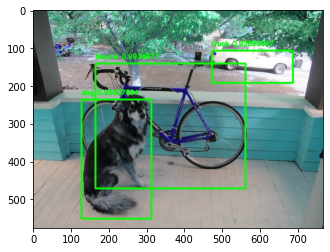

In [ ]:
# Predicting a test image to see whether installation is done properly
import matplotlib.pyplot as plt
output_path='/content/drive/MyDrive/Project Datasets/Capstone Project/darknet/darknet/data/dog_detected.jpg'
image = cv2.imread(output_path)
print(image.shape)
plt.imshow(image)
plt.show()

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [13]:
import gc
gc.collect()

216

In [12]:
!python gen_anchors.py -c config_pneumonia.json

image path is: /content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present2/c3768927-0d7e-4624-bf5a-3eea2011a5c1.jpg
image path is: /content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present2/c37cfadd-1e52-4704-9831-403826ad2974.jpg
image path is: /content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present2/c37d38fe-a11e-453a-88a5-5d919bf9f760.jpg
image path is: /content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present2/c37e4ade-605d-4b78-ada5-231c82b72b43.jpg
image path is: /content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present2/c3803501-05e4-4141-a61b-7af3187ade89.jpg
image path is: /content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present2/c3853f9a-a16f-4ee4-8bdb-5f636755855d.jpg
image path is: /content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present2/c38ac8c2-2de1-4e9c-8c38-1b09d89dec5e.jpg
image path is: /content/drive/MyDrive/Project Datasets/

In [14]:
!python train.py -c config_pneumonia.json

2021-07-11 13:24:56.614245: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-07-11 13:24:56.619152: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-07-11 13:24:56.619363: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c7bcb26a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-07-11 13:24:56.619396: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-07-11 13:24:56.622851: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-07-11 13:24:56.898829: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-11 13:24:56.899579: 

In [15]:
# test_image_path = testdir + '/'+os.listdir(testdir)[10]
test_image_path = '/content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present/c37e4ade-605d-4b78-ada5-231c82b72b43.jpg'

In [16]:
test_image_path

'/content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present/c37e4ade-605d-4b78-ada5-231c82b72b43.jpg'

In [17]:
image_paths = []
image_paths += [test_image_path]
# image_paths = [inp_file for inp_file in image_paths if (inp_file[-4:] in ['.jpg', '.png', 'JPEG'])]
print('image_paths=', image_paths)

image_paths= ['/content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present/c37e4ade-605d-4b78-ada5-231c82b72b43.jpg']


In [18]:
!python predict.py -c config_pneumonia.json -i '/content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present/c37e4ade-605d-4b78-ada5-231c82b72b43.jpg'

config_path= config_pneumonia.json  input_path= /content/drive/MyDrive/Project Datasets/Capstone Project/train_images_present/c37e4ade-605d-4b78-ada5-231c82b72b43.jpg output_path= output/
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2021-07-11 16:24:26.176161: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-07-11 16:24:26.212550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-11 16:24

(256, 256, 3)


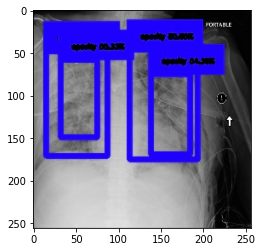

In [19]:
import matplotlib.pyplot as plt
output_path='/content/drive/MyDrive/Project Datasets/Capstone Project/keras-yolo3/output/c37e4ade-605d-4b78-ada5-231c82b72b43.jpg'
image = cv2.imread(output_path)
print(image.shape)
plt.imshow(image)
plt.show()

In [20]:
!python predict.py -c config_pneumonia.json -i '/content/drive/MyDrive/Project Datasets/Capstone Project/test_images/'

config_path= config_pneumonia.json  input_path= /content/drive/MyDrive/Project Datasets/Capstone Project/test_images/ output_path= output/
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2021-07-11 16:24:55.110927: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-07-11 16:24:55.142543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-11 16:24:55.143141: I tensorflow/core/common_runtime/gpu/

(256, 256, 3)


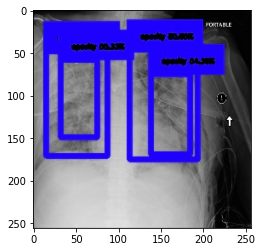

(256, 256, 3)


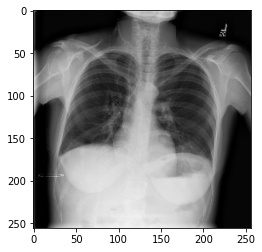

(256, 256, 3)


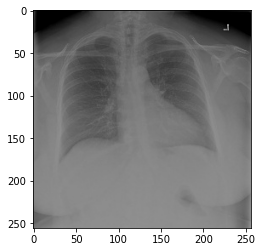

In [21]:
import matplotlib.pyplot as plt
output_path='/content/drive/MyDrive/Project Datasets/Capstone Project/keras-yolo3/output/'
for img in (os.listdir('output/'))[:3]:
  image = cv2.imread(os.path.join(output_path,img))
  print(image.shape)
  plt.imshow(image)
  plt.show()

In [ ]:
!python yolo3_one_file_to_detect_them_all.py -w '/content/drive/MyDrive/Project Datasets/Capstone Project/darknet/yolov3.weights' -i '/content/drive/MyDrive/Project Datasets/Capstone Project/darknet/darknet/data/dog.jpg'

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
loading weights of convolution #0
2021-07-07 12:10:53.018754: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-07-07 12:10:53.029210: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-07 12:10:53.029267: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (767f5d4f2b7a): /proc/driver/nvidia/version does not exist
2021-07-07 12:10:53.029706: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-07-07 12:10:53.034472: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2021-07-07 12:10:53.037973: I tensorflow/compiler/xla/service/service.cc:168] XLA service 